HOW MUCH RED PAINT DOES IT TAKE TO BE FUNNIER THAN SOUND?

In [2]:
# IMPORTS/CONSTANTS FOR EXPERIMENT

from main import *  # Must be reimported when changes made to module file

%load_ext autoreload 
%autoreload 2

treatment_mapping = (
    {  # TO DO : change name to treatment_info and add columns in df REMI
        1: {"treatment": "vehicles",
            "color": "white",
            "experiments": ["dose_response", "agonist_antagonist"],
            },
        2: {"treatment": "0.3mg/kgTCB",
            "color": "salmon",
            "experiments": ["dose_response"],
            },
        3: {"treatment": "3mg/kgTCB",
            "color": "red",
            "experiments": ["dose_response", "agonist_antagonist"],
            },
        4: {"treatment": "10mg/kgTCB",
            "color": "firebrick",
            "experiments": ["dose_response"],
            },
        5: {"treatment": "0.2mg/kgMDL",
            "color": "grey",
            "experiments": ["agonist_antagonist"],
            },
        6: {"treatment": "TCB+MDL",
            "color": "black",
            "experiments": ["agonist_antagonist"],
            },
    }
)


#PDD would like to do manuely with no stats BUT

#chose one set it and its a constant
#JJB: possible outlier tests  = ['grubbs', 'ROUT']  #JJB chece if grubbs is itterative and what limit set 
# possible post hoc = [ 'pLSD' , 'tukey' ]


compound_ratio_mapping = { 
    "DOPAC": ["DA"],
    "5HIAA": ["5HT"],
    "3MT": ["DA"],
    "HVA": ["DA", "3MT", "DOPAC"],
    "GLN": ["GLU"],
}
region_subclassification = {
    'cortex': {'regions': ['OF', 'PL', 'CC', 'IC', 'M', 'SL1', 'SR1', 'AC', 'V'], 'color': 'mediumblue'}, #SR6, SL6 ?
    'subcortical_telencephalon': {'regions': ['Am', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL'], 'color': 'orange'},
    'diencephalon': {'regions': ['MD', 'VPL', 'VPR', 'DG', 'Y'], 'color': 'darkorchid'},
    'mesencephalon': {'regions': ['SC', 'SN', 'VTA', 'DR', 'MR'], 'color': 'forestgreen'},
    'cerebellum': {'regions': ['CE'], 'color': 'peru'}
}
compound_subclassification = {
    'monoamines':['LDOPA', 'NA', 'A', '5HTP', 'DOPAC', 'DA', '5HIAA', 'HVA', '5HT', 'VMA', '3MT'],
    'amino_acids':['ASP', 'GLU', 'ASPN', 'HIS', 'LSER', 'GLN', 'ARG', 'GLY', 'THR', 'TAU', 'ALA', 'TYR', 'GABA'],
    'neurotransmitters':['DA','NA','5HT','GLU','GABA','ASP','GLY']
}



filename = "TCB2_data_HPLC.csv"  # TCB2 #using current working directory plus file name
HT_filename = "TCB2_data_HT.csv"


# JJB : this is how I believe it should be, your code relies on quantitative_statistics and correlation_statistics this should be removed
experimental_info = {
    "dose_response": {"groups": [1, 2, 3, 4], 
                      "independant_vars": ["TCB2"], 
                      "paired": False,
                      "parametric": True, #idealy this would be True / False / Check : check would involve checking the data using the spearman test which should already be done then taking the majority of the data to be parametric or not chose that 
                      "outliers": ['grubbs'], 
                      "quantitative_statistics": { "twoway_anova": False, #DELETE ONCE STATS LOGIC IN
                                                     "oneway_anova": True,
                                                     "tukey": True,}
                      },

    "agonist_antagonist": {"groups": [1,3,5,6,],  
                         "independant_vars": ["TCB2","MDL"],
                         "paired": False,
                         "parametric": True,
                         "outliers": ["grubbs"], 
                         "quantitative_statistics": { "twoway_anova": True, #DELETE ONCE STATS LOGIC IN
                                                     "oneway_anova": True,
                                                     "tukey": True,}
                           },
}


saveMetadata(
    filename, treatment_mapping=treatment_mapping, experimental_info=experimental_info, region_subclassification=region_subclassification, compound_subclassification=compound_subclassification, compound_ratio_mapping=compound_ratio_mapping
)

saveMetadata(
    HT_filename, treatment_mapping=treatment_mapping, experimental_info=experimental_info, region_subclassification=region_subclassification, compound_subclassification=compound_subclassification, compound_ratio_mapping=compound_ratio_mapping
)


TREATMENT MAPPING {1: {'treatment': 'vehicles', 'color': 'white', 'experiments': ['dose_response', 'agonist_antagonist']}, 2: {'treatment': '0.3mg/kgTCB', 'color': 'salmon', 'experiments': ['dose_response']}, 3: {'treatment': '3mg/kgTCB', 'color': 'red', 'experiments': ['dose_response', 'agonist_antagonist']}, 4: {'treatment': '10mg/kgTCB', 'color': 'firebrick', 'experiments': ['dose_response']}, 5: {'treatment': '0.2mg/kgMDL', 'color': 'grey', 'experiments': ['agonist_antagonist']}, 6: {'treatment': 'TCB+MDL', 'color': 'black', 'experiments': ['agonist_antagonist']}} SAVED TO /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC SUBCACHE
EXPERIMENTAL INFO {'dose_response': {'groups': [1, 2, 3, 4], 'independant_vars': ['TCB2'], 'paired': False, 'parametric': True, 'outliers': ['grubbs'], 'quantitative_statistics': {'twoway_anova': False, 'oneway_anova': True, 'tukey': True}}, 'agonist_antagonist': {'groups': [1, 3, 5, 6], 'independant_vars': ['TCB2', 'MDL'], 'paired': False, 'par

RETRIEVED "compound_and_ratios_df" FROM "TCB2_data_HPLC" CACHE
Invalid characters in identifier, replacing with '_' 
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/quantitative_summary_agonist_antagonist_for_5HT_in_[_OF__ _PL__ _CC__ _IC__ _M__ _SJ__ _SL1__ _SL6__ _SR6__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].pkl
SAVED /Users/jasminebutler/Desktop/phd/output/quantitative_summary/quantitative_summary_agonist_antagonist_for_5HT_in_[_OF__ _PL__ _CC__ _IC__ _M__ _SJ__ _SL1__ _SL6__ _SR6__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].svg
SAVED /Users/jasminebutler/Desktop/phd/output/quantitative_summary/quantitative_summary_agonist_antagonist_for_5HT_in_[_OF__ _PL__ _CC__ _IC__ _M__ _SJ__ _SL1__ _SL6__ _SR6__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ 

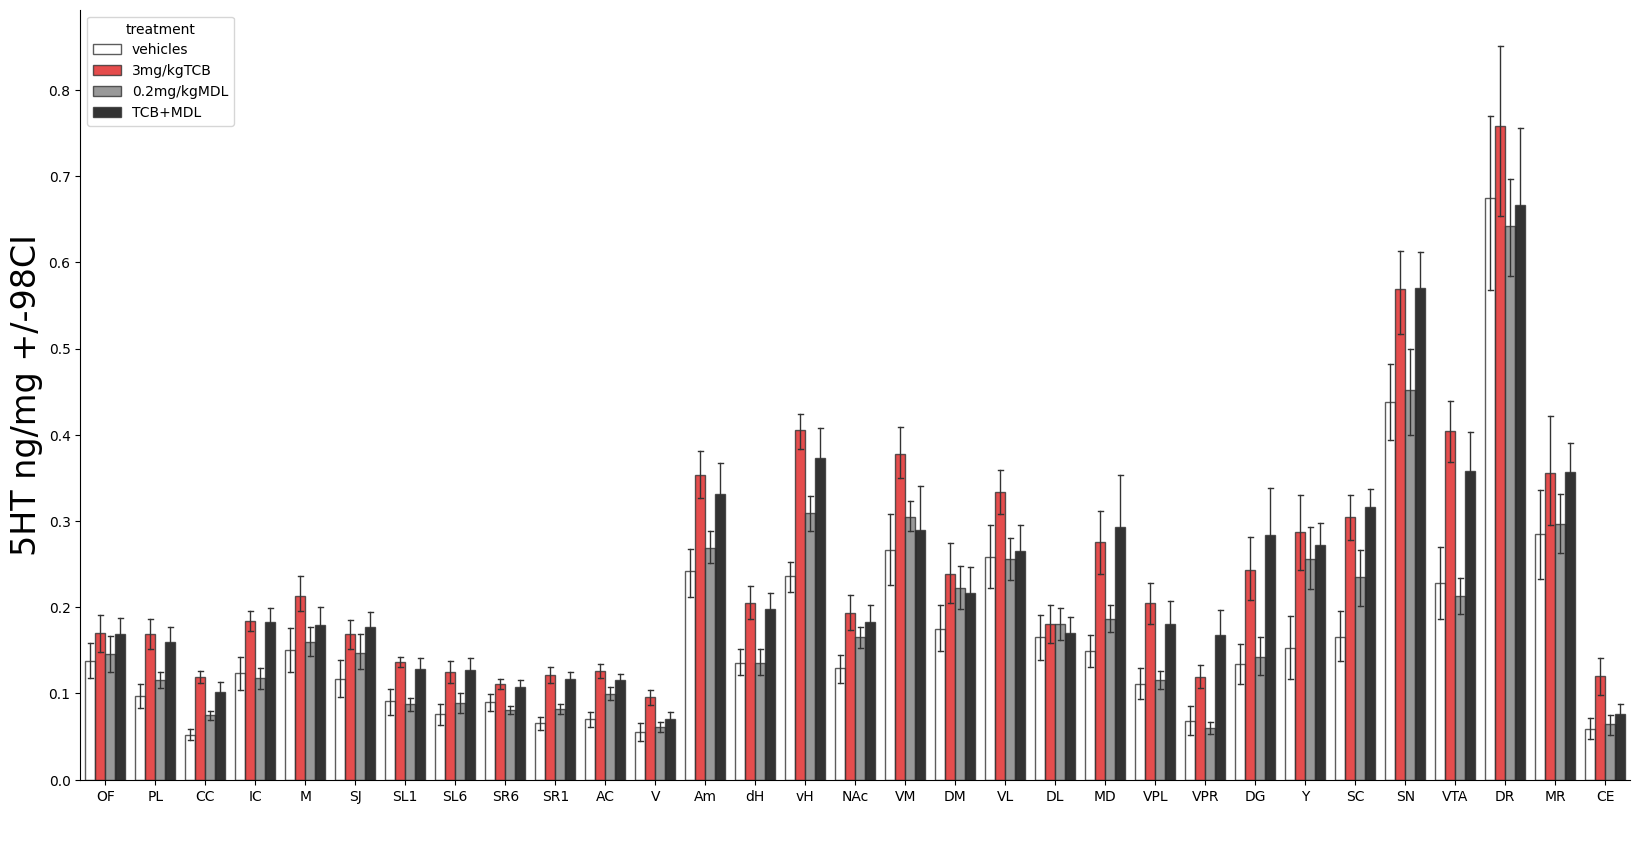

In [5]:
# quantitativeSummary(
#         filename,
#         experiment='dose_response',
#         histogram_type='compound', #chose a single compound or region
#         to_plot=['DA'], #chose a list of regions or compounds (x-axis of hist)
#         p_value_threshold=0.05,
#         columns=['DM','VM','DL','VL'],
#         from_scratch=True )

quantitativeSummary(filename)

Invalid characters in identifier, replacing with '_' 
RETRIEVED "compound_and_ratios_df_aggregate_stats" FROM "TCB2_data_HPLC" CACHE


/Users/jasminebutler/Desktop/phd/module/quantitative.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/percentage_vehicles_dose_response_for_DA_in_[_OF__ _PL__ _CC__ _IC__ _M__ _SJ__ _SL1__ _SL6__ _SR6__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].pkl
SAVED /Users/jasminebutler/Desktop/phd/output/percentage_vehicles/percentage_vehicles_dose_response_for_DA_in_[_OF__ _PL__ _CC__ _IC__ _M__ _SJ__ _SL1__ _SL6__ _SR6__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].svg
SAVED /Users/jasminebutler/Desktop/phd/output/percentage_vehicles/percentage_vehicles_dose_response_for_DA_in_[_OF__ _PL__ _CC__ _IC__ _M__ _SJ__ _SL1__ _SL6__ _SR6__ _SR1__ _AC__ _V__ _Am__ _dH__ _vH__ _NAc__ _VM__ _DM__ _VL__ _DL__ _MD__ _VPL__ _VPR__ _DG__ _Y__ _SC__ _SN__ _VTA__ _DR__ _MR__ _CE_].png


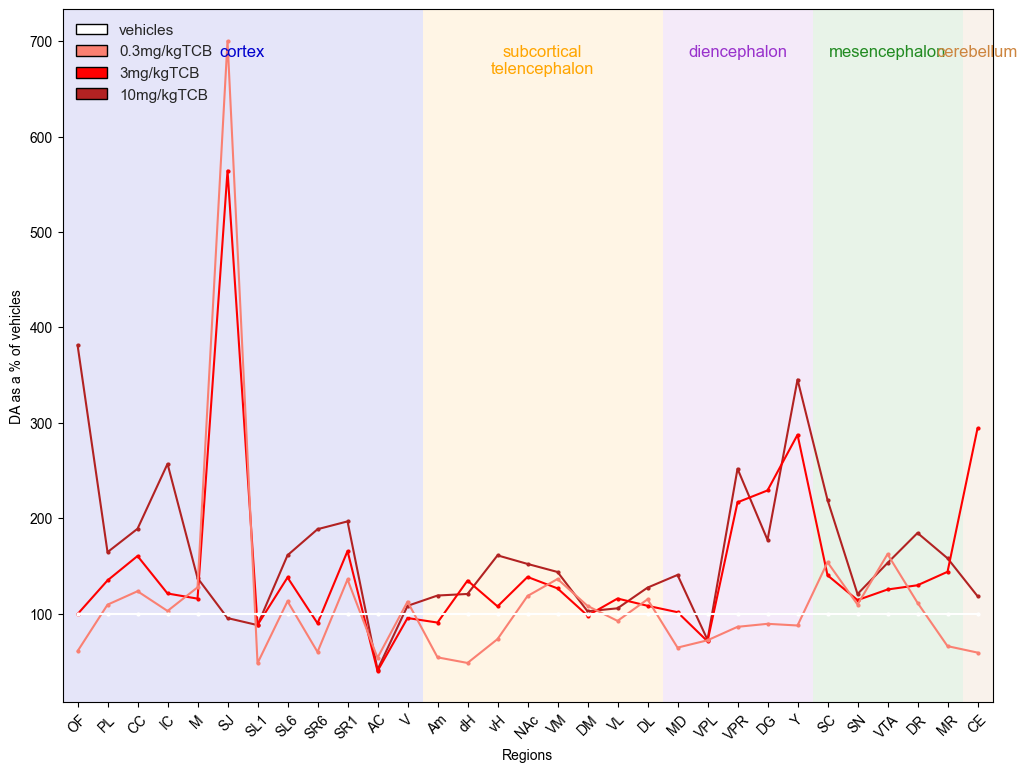

In [2]:
#CHOSE ALL OUTLIERS IN LOOP - REMI (ratios only compound_ratio_mapping)
percentageVehiclesFig(
        filename,
        experiment='dose_response',
        compound='DA',
        regions=["OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V",  
                "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"], #REMI i would ike this to work the same way it does for correlograms i.e. also specifying the order 
        from_scratch=True )


{'TYR/LSER', 'ARG/LSER', 'A/GLU', '3MT/THR', '3MT/HSER', 'ARG/A', 'DOPAC/LSER', 'HIS/GLY', '5HIAA/GLN', '5HIAA/GABA', 'HSER', 'DOPAC/GABA', 'HVA/5HTP', '5HT/VMA', 'LDOPA', '5HT/TAU', 'GLU/HSER', 'LDOPA/GLY', '5HIAA/THR', '5HT/GLY', 'ARG/ASP', 'LSER/THR', 'VMA/DA', 'GLN/A', 'ARG/HVA', 'TAU', '5HTP/THR', 'HSER/5HIAA', 'ARG/NA', 'NA/ALA', 'LSER/NA', '5HIAA/LSER', 'ASPN/NA', 'ASPN/VMA', '3MT/ASPN', 'TYR/A', 'GLY/3MT', 'VMA/TYR', '5HTP/ALA', 'GLU/GLY', '5HT/LSER', '5HIAA/GLU', 'HSER/DOPAC', 'GABA/ASPN', 'GLN/3MT', 'ASPN/TYR', 'DA/ALA', '3MT/VMA', 'HVA/DA', 'TYR/VMA', 'HIS/3MT', 'HVA', '5HIAA/DOPAC', 'TAU/ARG', 'GLN/5HIAA', '5HT/GLN', 'GABA/LSER', 'GLU/LDOPA', '5HIAA/A', 'DA/TAU', '5HT/TYR', 'HIS/HSER', 'A/HIS', 'NA/GLY', '5HTP', 'GLY/HVA', 'GLY/5HIAA', 'DOPAC/5HT', 'DOPAC/A', 'ALA/GLU', '5HT', 'NA/HIS', 'A/TAU', 'VMA/HVA', 'GLN/VMA', 'GLY/GABA', 'GLU/HIS', 'THR/HIS', '5HTP/ARG', 'ASP/TAU', 'ARG/LDOPA', 'DA/HIS', 'VMA/GLY', 'GABA/VMA', 'DA/LSER', 'THR/DA', 'LDOPA/DA', 'HIS/A', 'NA/5HIAA', '5

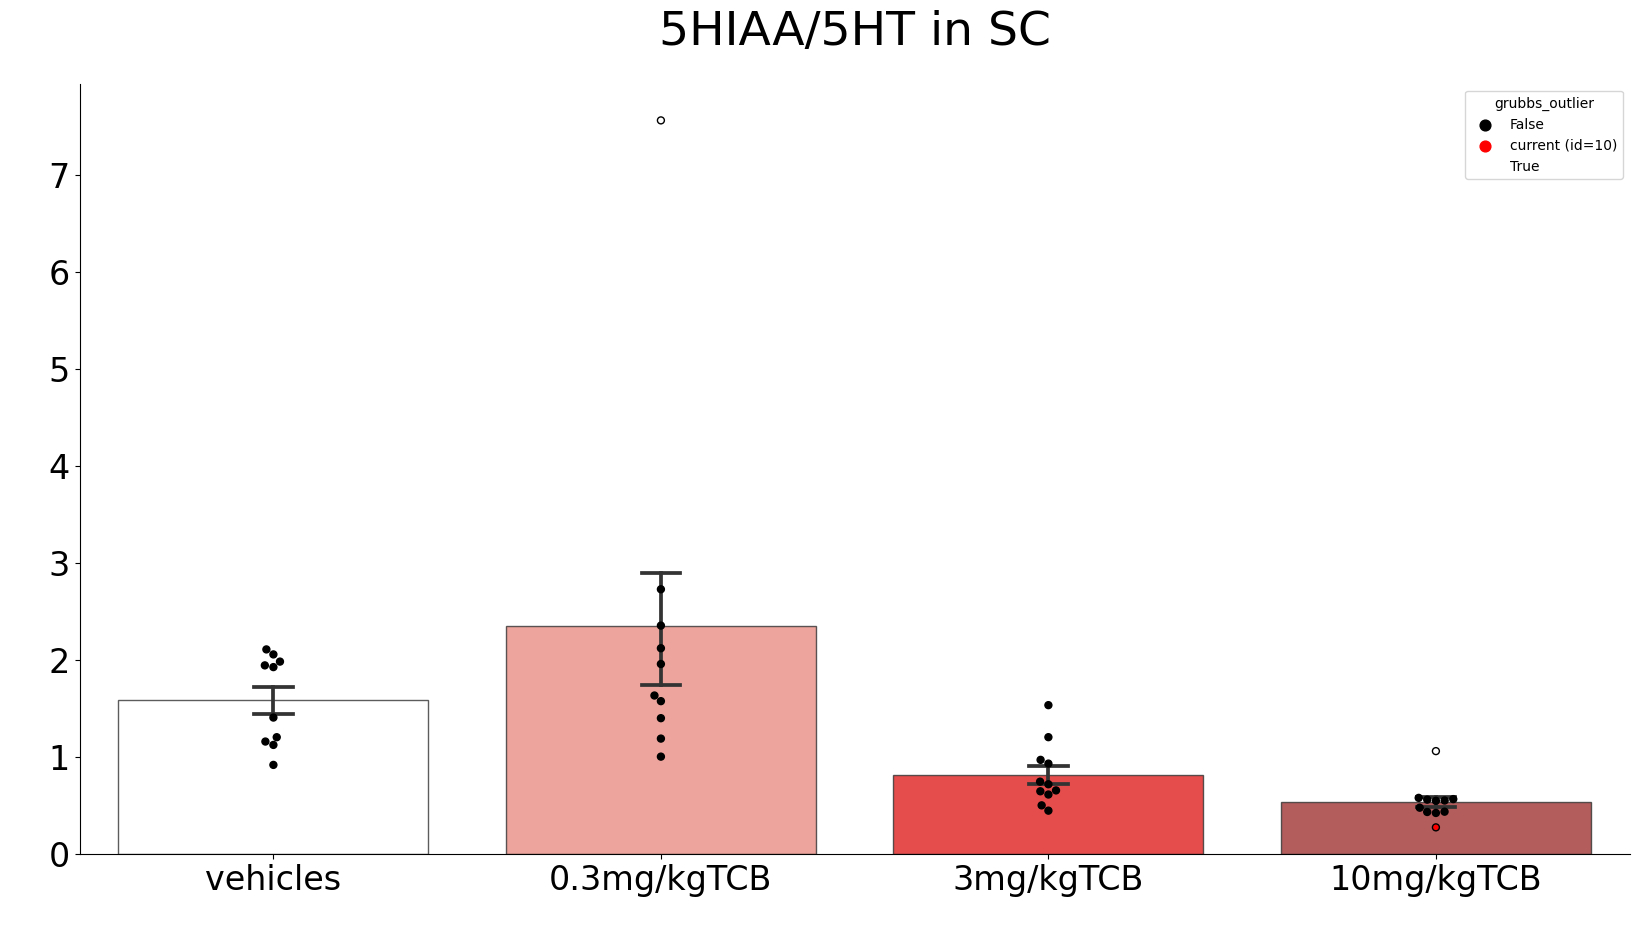

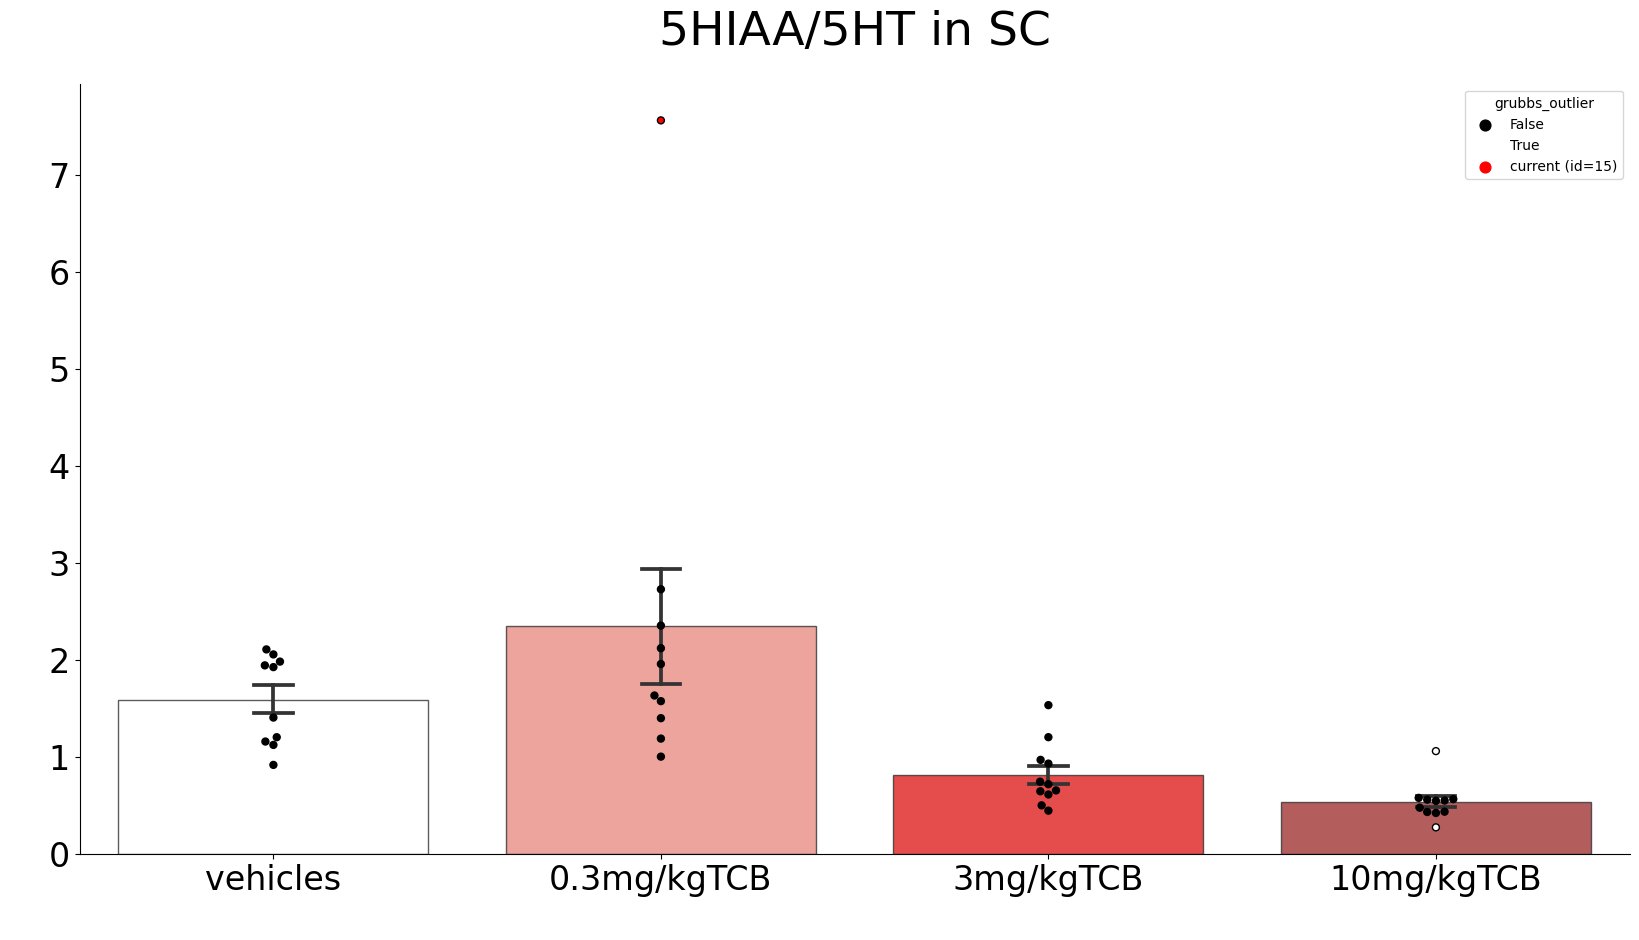

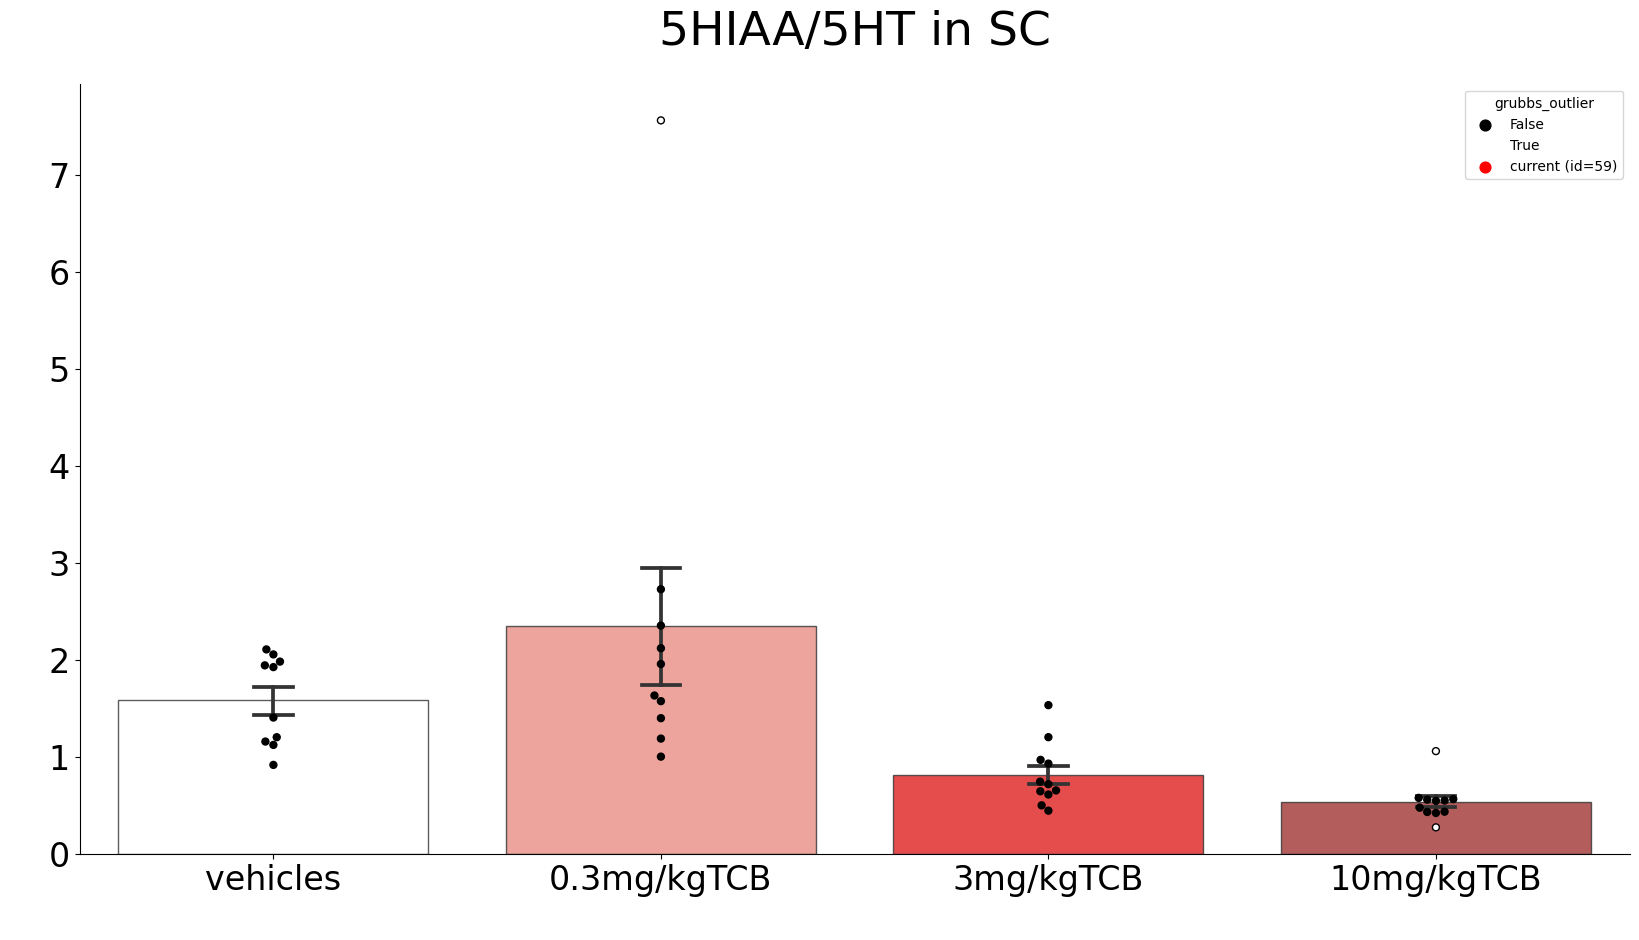

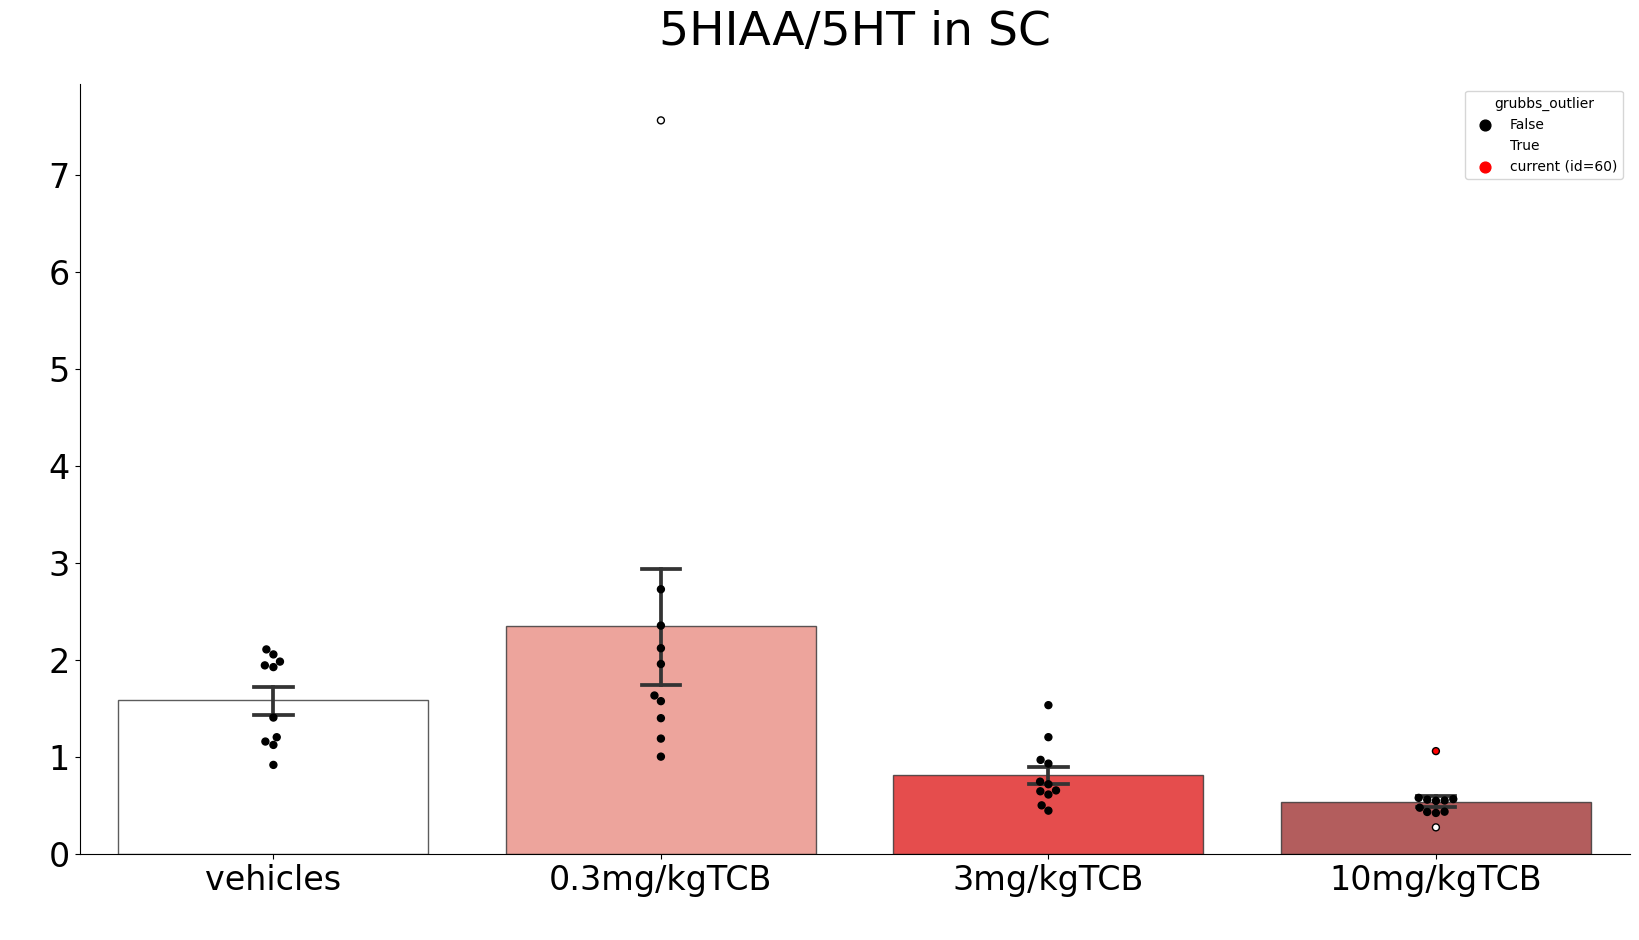

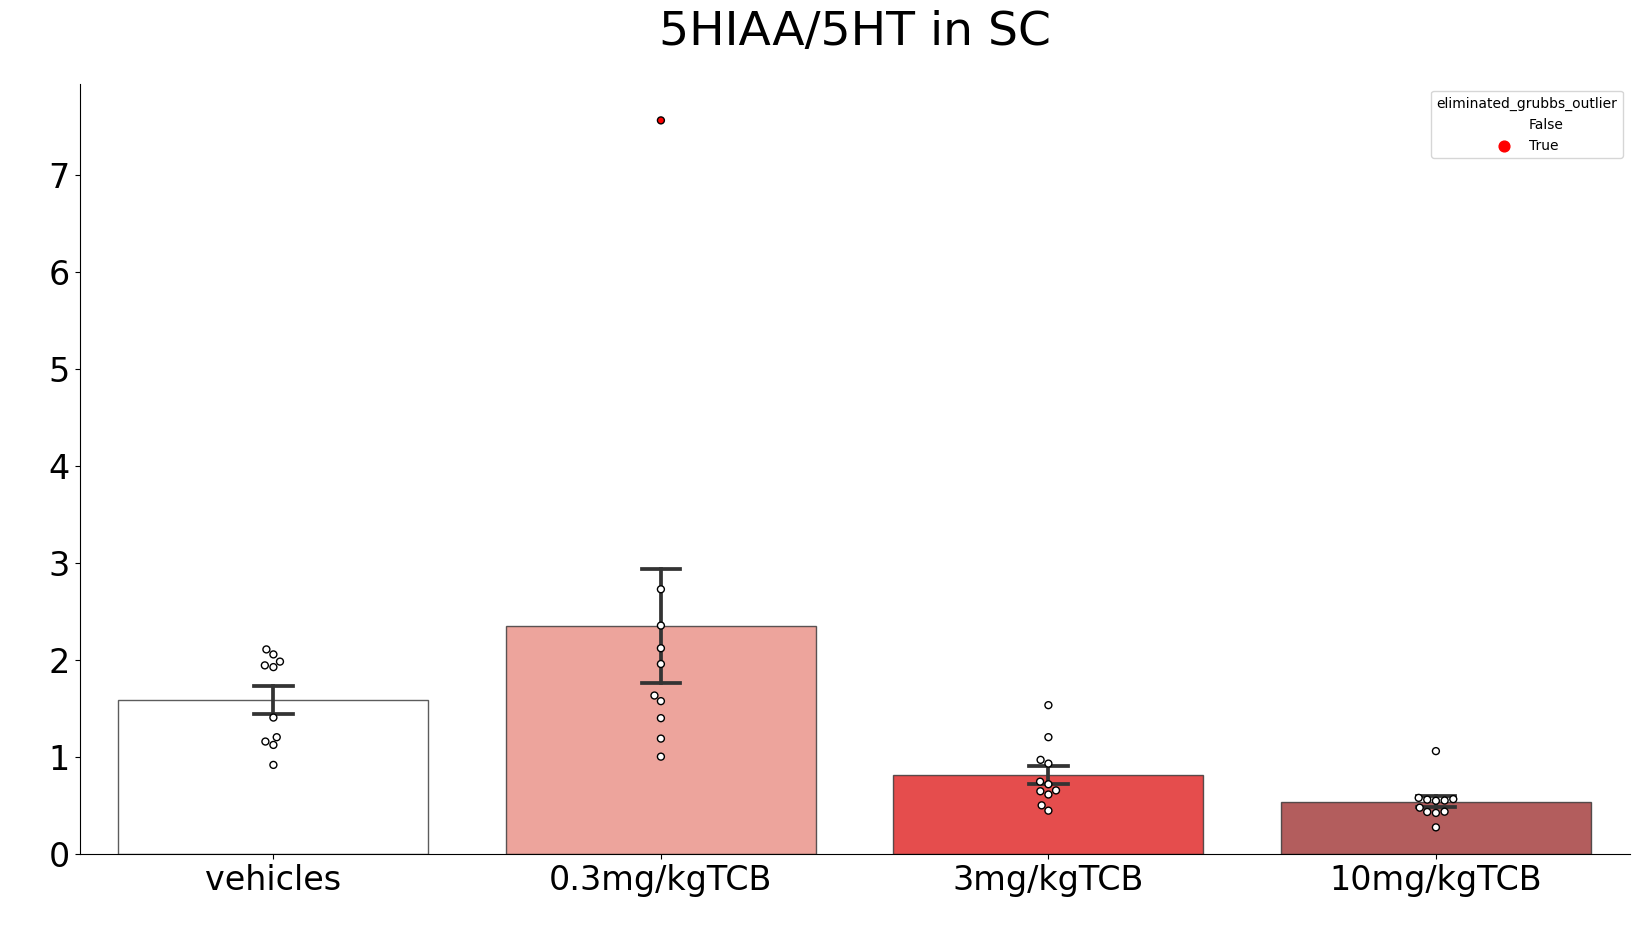

CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/compound_and_ratios_df.pkl
['grubbs_outlier', 'eliminated_grubbs_outlier'] UPDATED FOR 5HIAA/5HT in SC of dose_response experiment

ONE_WAY_ANOVA NOT SIGNIFICANT
    F  p_value
0 NaN      NaN

TUKEY NOT SIGNIFICANT
        group1      group2  meandiff  p-adj  lower  upper  reject
0  0.3mg/kgTCB  10mg/kgTCB   -1.2367    NaN    NaN    NaN   False
1  0.3mg/kgTCB   3mg/kgTCB   -0.9586    NaN    NaN    NaN   False
2  0.3mg/kgTCB    vehicles       NaN    NaN    NaN    NaN   False
3   10mg/kgTCB   3mg/kgTCB    0.2781    NaN    NaN    NaN   False
4   10mg/kgTCB    vehicles       NaN    NaN    NaN    NaN   False
5    3mg/kgTCB    vehicles       NaN    NaN    NaN    NaN   False


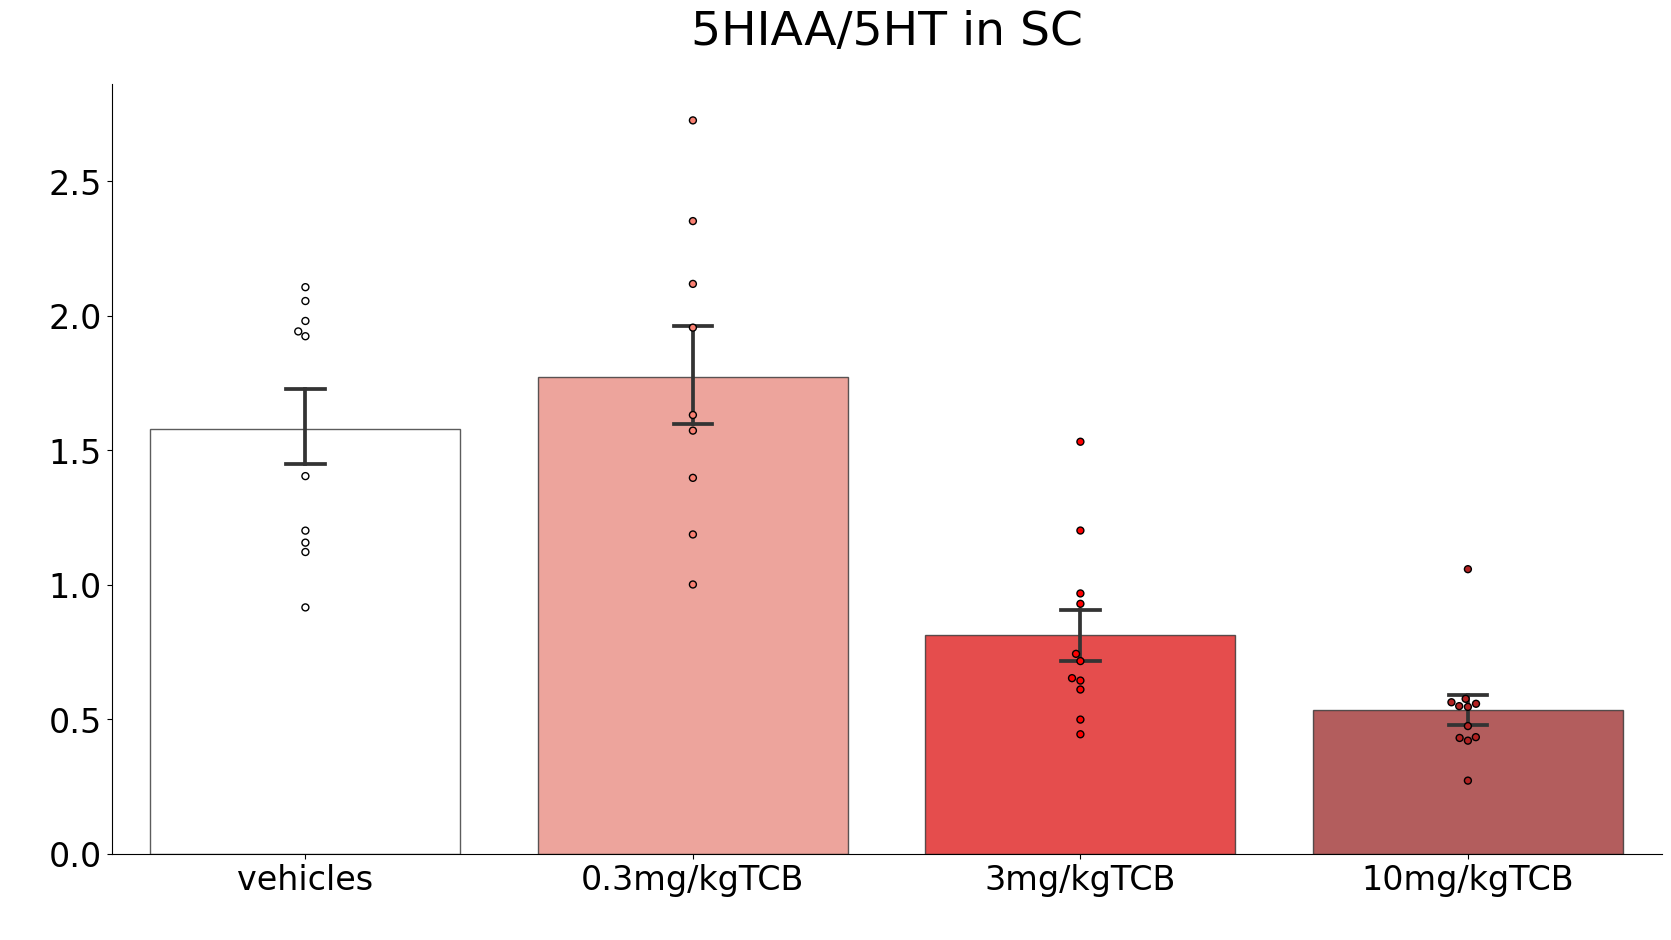

CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/dose_response_for_5HIAA_5HT_in_SC.pkl
SAVED /Users/jasminebutler/Desktop/phd/output/histogram/dose_response_for_5HIAA_5HT_in_SC.svg
SAVED /Users/jasminebutler/Desktop/phd/output/histogram/dose_response_for_5HIAA_5HT_in_SC.png


In [4]:
#QUANTITATIVE HISTOGRAMS

quantitativeHistogram( 
    filename,
    p_value_threshold=0.05,
)

# quantitativeHistogram( #REMI this still forces prompts - not fun
#     filename,
#     experiment='agonist_antagonist',
#     compound='5HIAA/5HT',
#     region='AC',
#     outlier_test= 'grubbs', #this should not be asked every time it is something you would set once in the constants for this experiment, could do redo_outliers = T/F
#     #it forced me to do outliers as ther were not done 5HIAA/5HT in DL dont love this 
#     p_value_threshold=0.05, #again this should be a constant for the experiment 
#     from_scratch=True,
# )

# subselectDf(getCompoundAndRatiosDf(filename), {'compound':'5HIAA/5HT', 'region':'OF', 'experiment':'agonist_antagonist'})


Invalid characters in identifier, replacing with '_' 
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/dose_response_compound_5HT_OF_PL_CC_IC_M_AC_V.pkl
SAVED /Users/jasminebutler/Desktop/phd/output/correlogram/dose_response_compound_5HT_OF_PL_CC_IC_M_AC_V.svg
SAVED /Users/jasminebutler/Desktop/phd/output/correlogram/dose_response_compound_5HT_OF_PL_CC_IC_M_AC_V.png


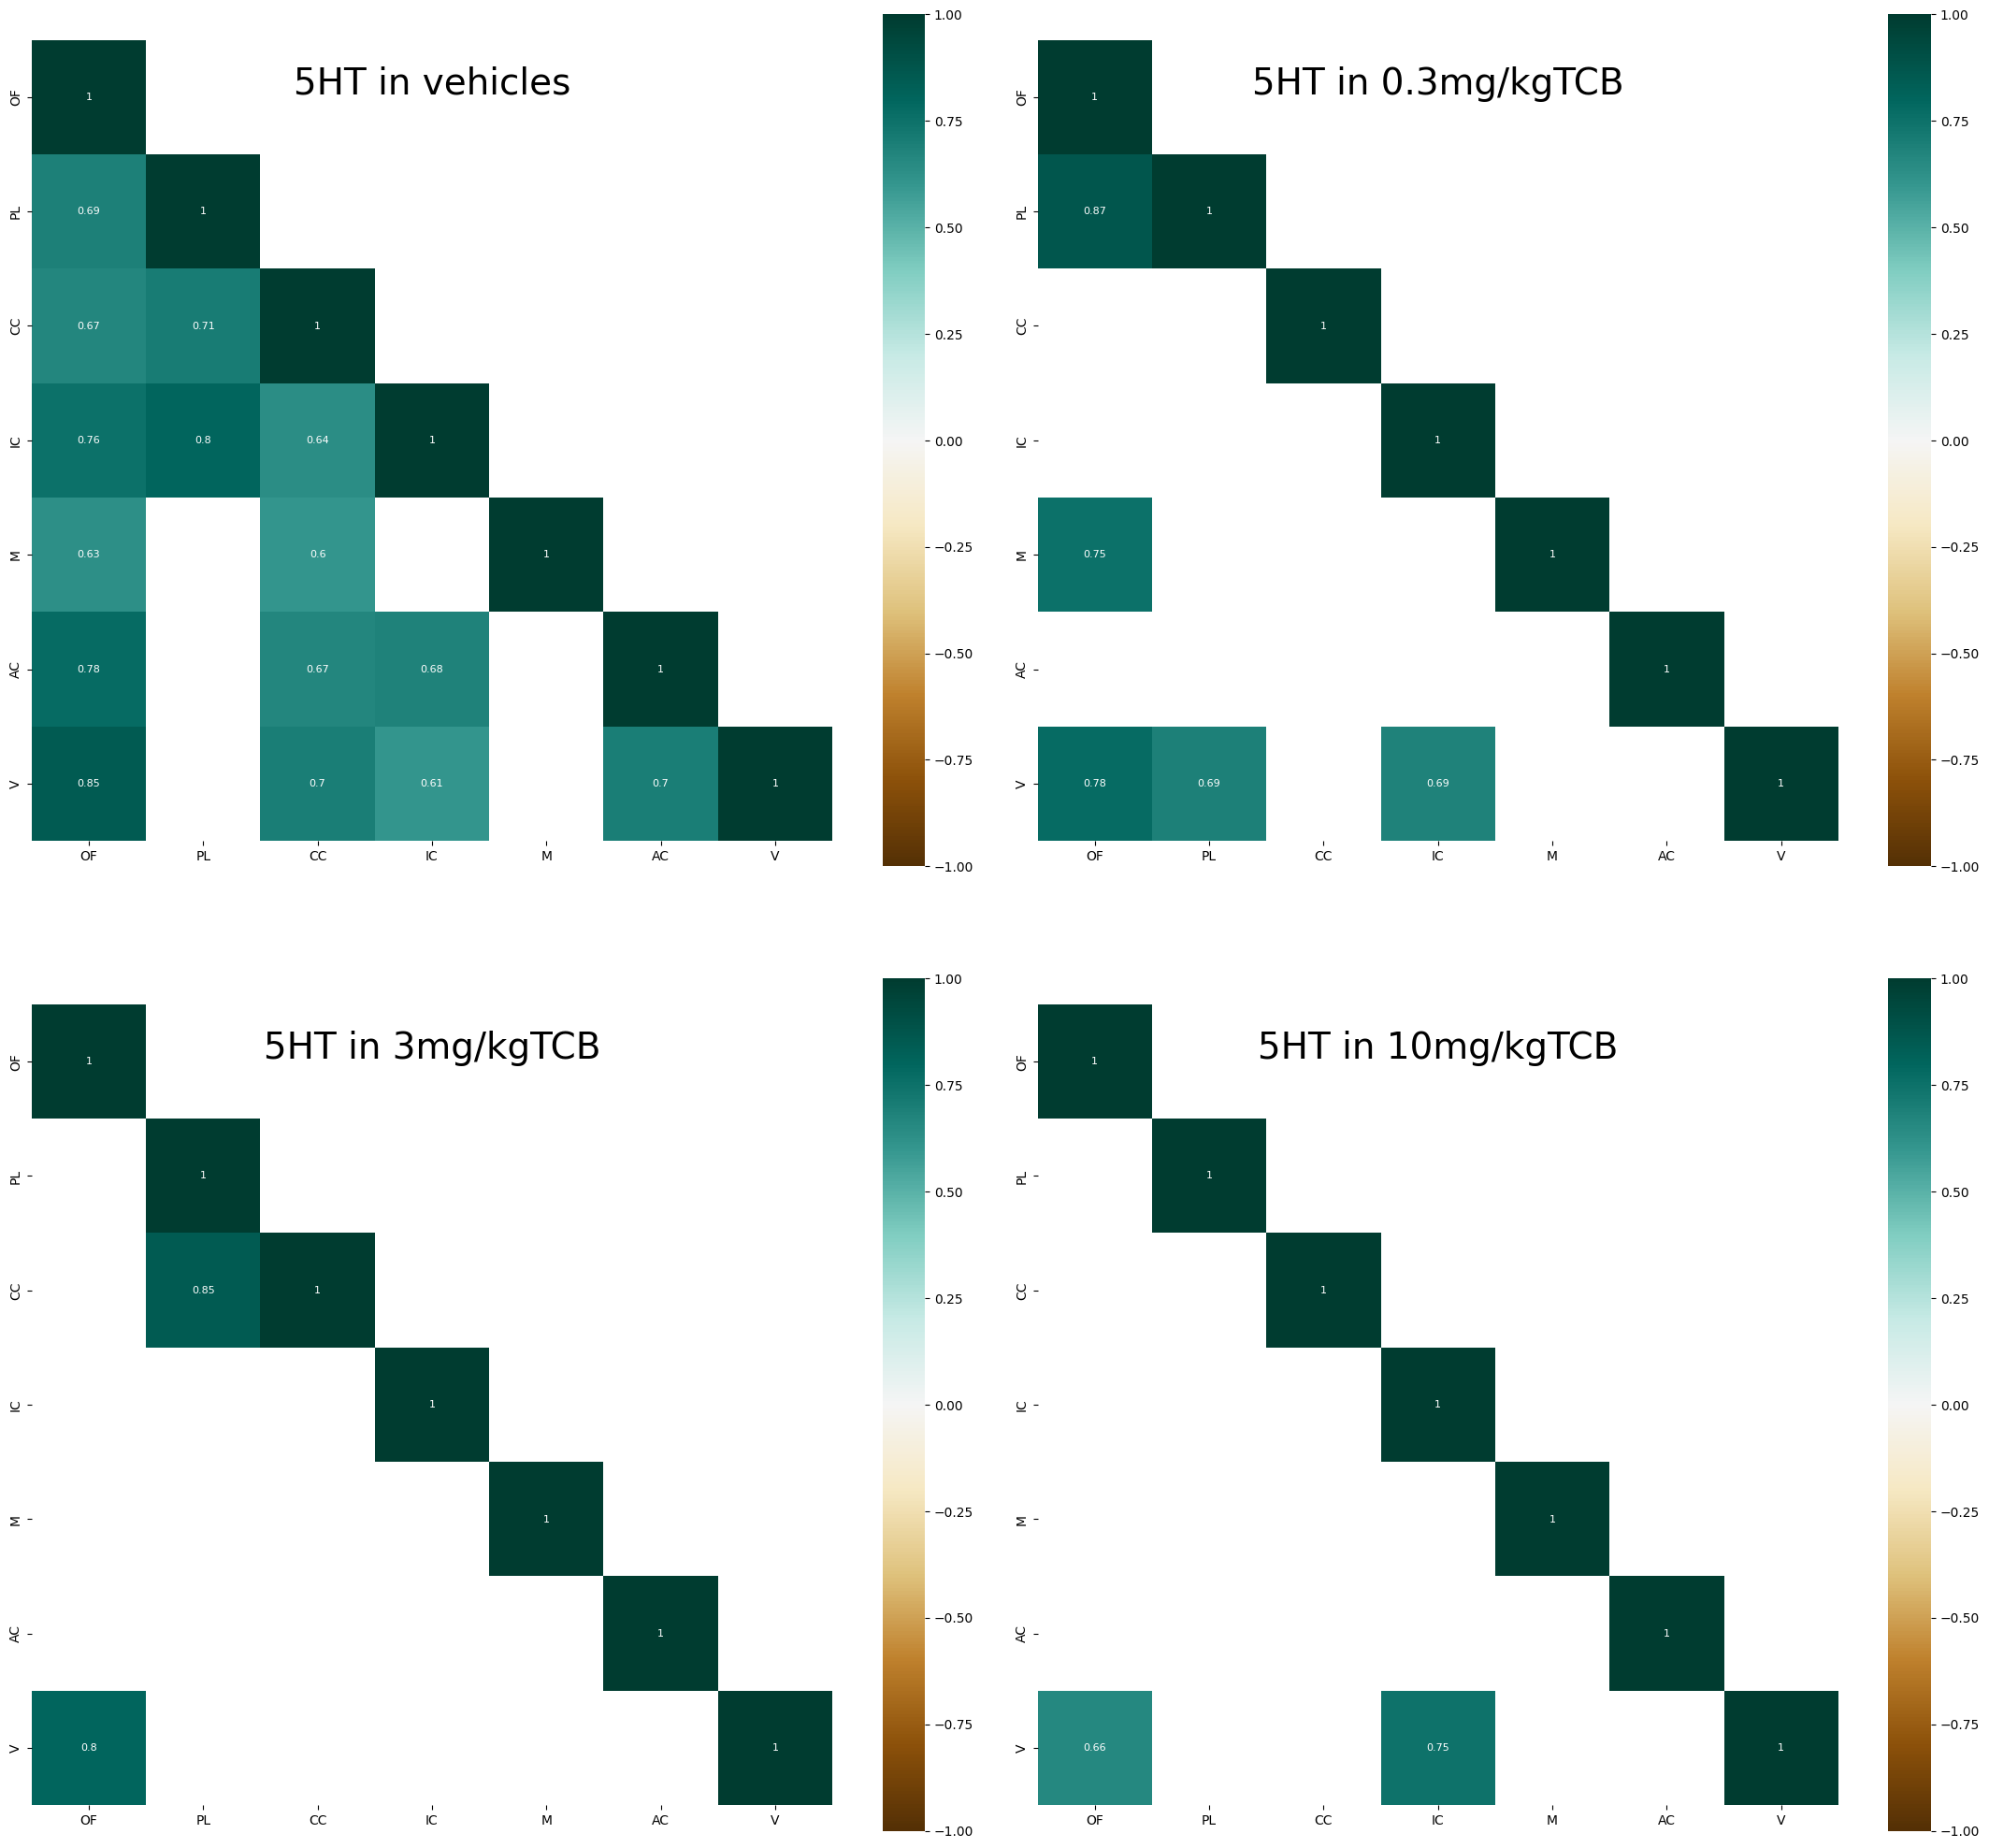

In [6]:
#CORRELOGRAMS

correlogram(filename, p_value_threshold=0.05) #with prompts

#copy bellow 
# OF,PL,CC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE


# correlogram(filename, 
#             experiment='agonist_antagonist', 
#             correlogram_type='compound',
#             to_correlate='DA-5HT', 
#             p_value_threshold=0.05, 
#             n_minimum=5, 
#             columns=["OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V",  
#                      "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
#                      "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"],
#             from_scratch=True,
#             )

BUILDING "headtwitch_df"
BUILDING "raw_df"
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HT/raw_df.pkl
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HT/headtwitch_df.pkl
RETRIEVED "headtwitch_df" FROM "TCB2_data_HT" CACHE
WARNING
NotImplemented should not be used in a boolean context

TWO_WAY_ANOVA SIGNIFICANT
       Source       SS    DF       MS       F  p-unc   np2
0        TCB2  121.684   1.0  121.684  34.552    0.0  0.49
1         MDL    0.000   1.0    0.000   0.000    1.0  0.00
2  TCB2 * MDL   99.531   1.0   99.531  28.262    0.0  0.44
3    Residual  126.784  36.0    3.522     NaN    NaN   NaN

ONE_WAY_ANOVA SIGNIFICANT
           F       p_value
0  85.733301  6.245866e-16

TUKEY SIGNIFICANT
        group1     group2  meandiff   p-adj   lower   upper  reject
0  0.2mg/kgMDL  3mg/kgTCB    5.3636  0.0000  4.3233  6.4040    True
1  0.2mg/kgMDL    TCB+MDL    0.6364  0.3642 -0.4040  1.6767   False
2  0.2mg/kgMDL   vehicles    0.3333  0.8835 -0.8962  1.56

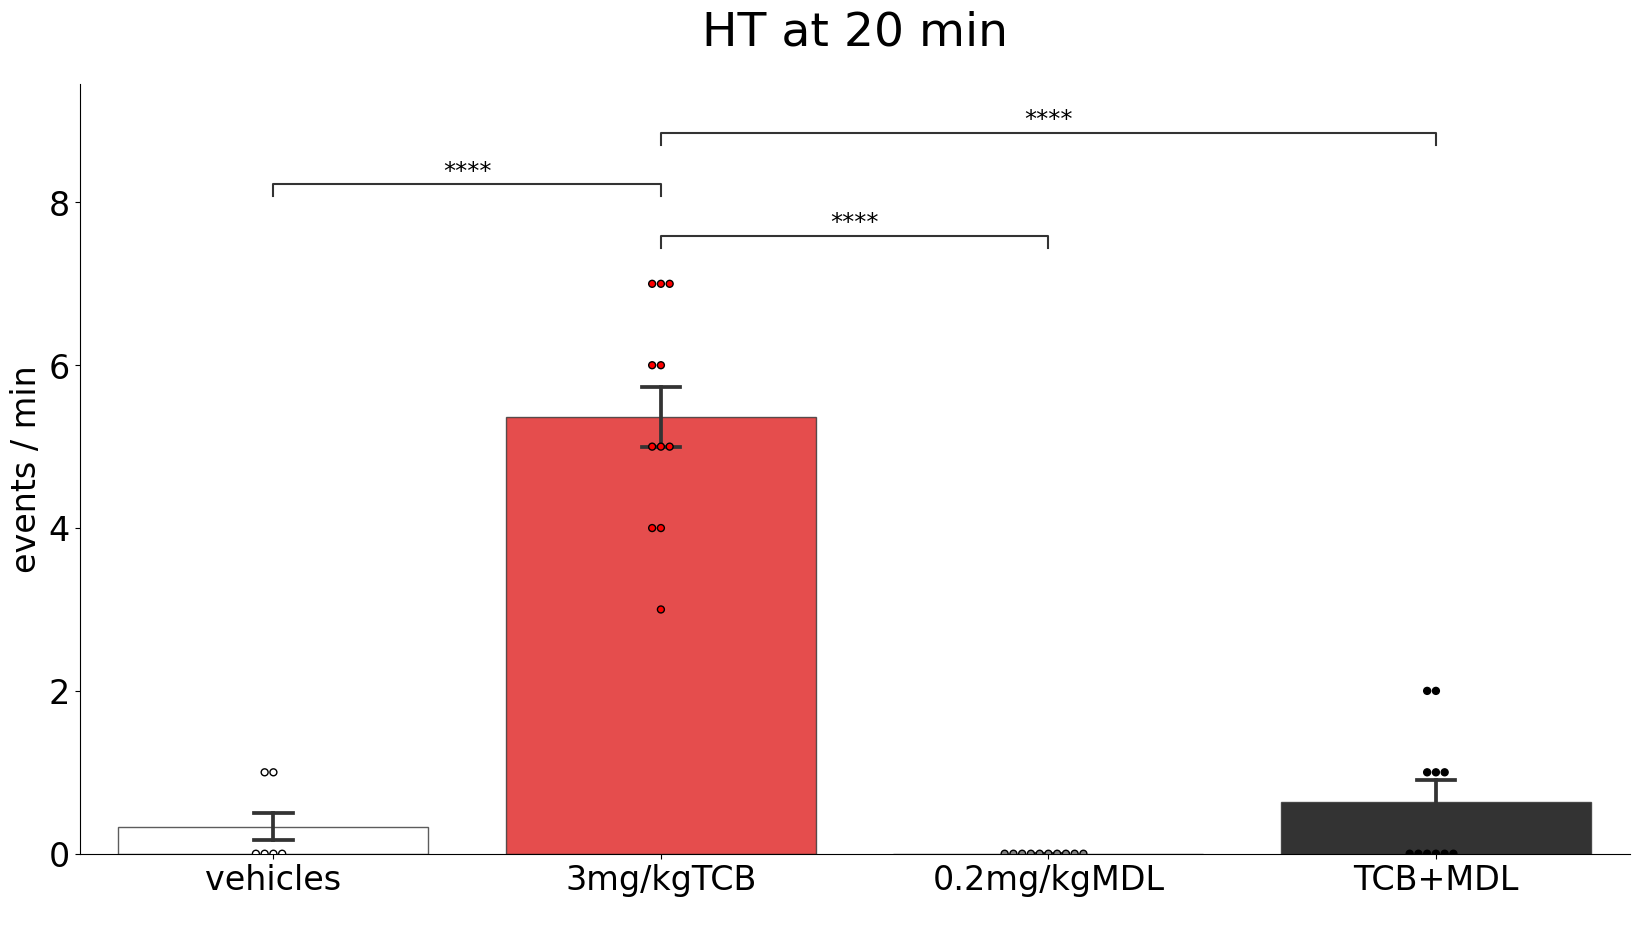

In [5]:
#BEHQVIOR (HT / ES) #REMI need to intergrate stats logic, outliers, prompts and building multiple at once
headTwitchHistogram(
    HT_filename,
    experiment='agonist_antagonist',
    vairable='HT_20',
    outlier_test=None,
    p_value_threshold=0.05,
    from_scratch=True,
)

# subselectDf(getHeadTwitchDf(HT_filename), {"treatment": "0.2mg/kgMDL", "experiment": "agonist_antagonist"})


In [3]:
#SUBSELECT RAW DATA
data = getCompoundAndRatiosDf(filename)
subselectDf(data, {"treatment": "3mg/kgTCB", "experiment": "dose_response", "region":["OF", "AC"]})
#second pram is a dict of colname and subgroup to select


RETRIEVED "compound_and_ratios_df" FROM "TCB2_data_HPLC" CACHE


,mouse_id,group_id,value,compound,region,treatment,color,experiment,grubbs_outlier,eliminated_grubbs_outlier
11,16,3,166.850105,ASP,OF,3mg/kgTCB,red,dose_response,NaN,NaN
13,18,3,198.952480,ASP,OF,3mg/kgTCB,red,dose_response,NaN,NaN
14,19,3,103.904387,ASP,OF,3mg/kgTCB,red,dose_response,NaN,NaN
17,22,3,184.189661,ASP,OF,3mg/kgTCB,red,dose_response,NaN,NaN
22,27,3,93.515798,ASP,OF,3mg/kgTCB,red,dose_response,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
431172,55,3,33.864906,5HT/5HTP,AC,3mg/kgTCB,red,dose_response,NaN,NaN
431173,55,3,5.612299,5HT/DOPAC,AC,3mg/kgTCB,red,dose_response,NaN,NaN
431174,55,3,3.482566,5HT/DA,AC,3mg/kgTCB,red,dose_response,NaN,NaN
431175,55,3,1.436135,5HT/5HIAA,AC,3mg/kgTCB,red,dose_response,NaN,NaN


In [3]:
#GET AGGERGATED STATS DF
subselectDf(getAggregateStatsDf(filename), {"treatment": "10mg/kgTCB", "experiment": "dose_response"})
#second pram is a dict of colname and subgroup to select


RETRIEVED "compound_and_ratios_df_aggregate_stats" FROM "TCB2_data_HPLC" CACHE


,treatment,region,compound,experiment,shapiro_F,shapiro_p,is_valid,mean,std,sem,values
27868,10mg/kgTCB,AC,5HIAA,dose_response,0.948802,0.628688,True,0.061213,0.017420,0.005252,"[0.08560137, 0.053223793, 0.049058342, 0.02844..."
27869,10mg/kgTCB,AC,5HIAA/5HT,dose_response,0.984413,0.985714,True,0.432047,0.085798,0.025869,"[0.4687343760560557, 0.42240950001580946, 0.35..."
27870,10mg/kgTCB,AC,5HIAA/5HTP,dose_response,0.687213,0.000321,True,10.980239,13.005499,3.921305,"[2.831817541240991, 4.945500969470258, 4.28915..."
27871,10mg/kgTCB,AC,5HIAA/A,dose_response,0.741892,0.001630,True,106.286189,140.887185,42.479085,"[433.24697212788675, 241.02140599385942, 89.10..."
27872,10mg/kgTCB,AC,5HIAA/ALA,dose_response,0.900112,0.185434,True,0.001761,0.000419,0.000126,"[0.0018212453502475417, 0.0015957668563622504,..."
...,...,...,...,...,...,...,...,...,...,...,...
41797,10mg/kgTCB,vH,TYR/HVA,dose_response,NaN,1.000000,True,107.189108,140.212220,44.338997,"[283.1047605366569, 0.0, 0.0, 0.0, 0.0, 0.0, n..."
41798,10mg/kgTCB,vH,TYR/LSER,dose_response,0.772418,0.004083,True,0.084346,0.102888,0.031022,"[0.23636591002983406, 0.0, 0.0, 0.0, 0.0, 0.0,..."
41799,10mg/kgTCB,vH,TYR/NA,dose_response,0.782937,0.005611,True,14.438259,17.614757,5.311049,"[47.39925284857632, 0.0, 0.0, 0.0, 0.0, 0.0, 2..."
41800,10mg/kgTCB,vH,TYR/TAU,dose_response,0.767298,0.003499,True,0.008388,0.010507,0.003168,"[0.02597720632187491, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
#PCA

In [ ]:
#GRAPH THEORY 
#https://networkx.org/documentation/latest/